In [1]:
#1
import re
import numpy as np
import glob
import random
import matplotlib.pyplot as plt

import pandas as pd
from urllib.request import urlopen
from lxml import etree

In [2]:
#31
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv1D, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Model
import datetime

from tensorflow.keras.callbacks import EarlyStopping

#for tentsorboard
import tensorflow.keras.callbacks
#import tensorflow.keras.backend.tensorflow_backend as KTF
import tensorflow.keras.backend as KTF
import tensorflow as tf

from tensorflow.keras.models import load_model

#Vurnum = 実験番号
Vernum = 99

import os

In [179]:
#loding ndarray
print(type(np.load('./saving_ndarray/x_train/x_train_all_.npy')))
print(np.load('./saving_ndarray/x_train/x_train_all_.npy'))

x_train_all = np.load('./saving_ndarray/x_train/x_train_all_.npy')
y_train_all = np.load('./saving_ndarray/x_train/y_train_all_.npy')
x_train_all_5crossval = np.load('./saving_ndarray/x_train/x_train_all_5crossval_.npy')
y_train_all_5crossval = np.load('./saving_ndarray/x_train/y_train_all_5crossval_.npy')
#x_train_positive_all_5crossval_.npy
x_train_positive_all_5crossval = np.load('./saving_ndarray/x_train/x_train_positive_all_5crossval_.npy') 
x_train_negative_all_5crossval = np.load('./saving_ndarray/x_train/x_train_negative_all_5crossval_.npy')
print("END")

<class 'numpy.ndarray'>
[[[[ 0.000000e+00]
   [-7.358760e-02]
   [ 0.000000e+00]
   ...
   [-1.995000e-04]
   [ 5.935090e-02]
   [ 0.000000e+00]]

  [[-3.838254e-01]
   [-2.554557e-01]
   [-8.600770e-02]
   ...
   [ 5.738126e-01]
   [-7.869063e-01]
   [ 7.227214e-01]]

  [[ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]
   ...
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]]

  ...

  [[ 1.000000e+00]
   [ 1.000000e+00]
   [ 1.000000e+00]
   ...
   [ 1.000000e+00]
   [ 3.000000e+00]
   [ 1.000000e+00]]

  [[ 3.000000e+00]
   [ 2.000000e+00]
   [ 2.000000e+00]
   ...
   [ 3.000000e+00]
   [ 2.000000e+00]
   [ 2.000000e+00]]

  [[ 0.000000e+00]
   [ 1.000000e+00]
   [ 0.000000e+00]
   ...
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 1.000000e+00]]]


 [[[ 0.000000e+00]
   [-9.987427e-01]
   [ 0.000000e+00]
   ...
   [ 0.000000e+00]
   [ 0.000000e+00]
   [ 0.000000e+00]]

  [[ 0.000000e+00]
   [-7.458280e-01]
   [ 7.227214e-01]
   ...
   [ 1.630295e-01]
   [-2.554557e-01]
   [

In [2]:
var = 950
filename = f'./validation/DFS_parameter/trial_{var}.csv'
df_trial = pd.read_csv(filename)

In [5]:
df_trial

,Unnamed: 0,loss,acc,val_loss,val_acc,Kernel,Conv2D,hidden01,epochs,Batch_size
0,0,711.420528,0.473186,0.692919,0.525641,14x8,16.0,10.0,10.0,128.0
1,1,0.692961,0.520505,0.692870,0.525641,14x8,16.0,10.0,10.0,128.0
2,2,0.692941,0.520505,0.692831,0.525641,14x8,16.0,10.0,10.0,128.0
3,3,0.692934,0.520505,0.692762,0.525641,14x8,16.0,10.0,10.0,128.0
4,4,0.692943,0.520505,0.692723,0.525641,NaN,NaN,NaN,NaN,NaN
5,5,0.692834,0.520505,0.692719,0.525641,NaN,NaN,NaN,NaN,NaN
6,6,0.692819,0.520505,0.692707,0.525641,NaN,NaN,NaN,NaN,NaN
7,7,0.692813,0.520505,0.692704,0.525641,NaN,NaN,NaN,NaN,NaN
8,8,0.692804,0.520505,0.692689,0.525641,NaN,NaN,NaN,NaN,NaN
9,9,0.692789,0.520505,0.692669,0.525641,NaN,NaN,NaN,NaN,NaN


In [11]:
list(df_trial.iloc[:, 1])

[711.4205281832242,
 0.6929610191083481,
 0.6929412689118731,
 0.6929339104646388,
 0.6929434075340487,
 0.6928335847538728,
 0.6928191098505014,
 0.6928134045390301,
 0.6928036983832953,
 0.6927887840601924]

In [18]:
print(list(range(10)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


TypeError: 'AxesSubplot' object is not callable

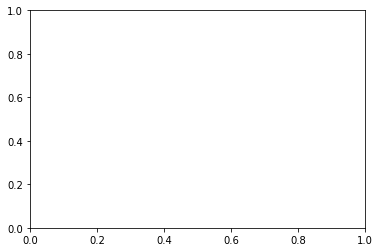

In [19]:
Figure, ax = plt.subplots()
#plot.ylim(0.0,1.0)
ax(list(range(10)), list(df_trial.iloc[:, 1]))
ax.set_ylim([0.0,1.0])

In [20]:
df_trial.iloc[:, 0]

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
Name: Unnamed: 0, dtype: int64

In [21]:
display(df_trial)

,Unnamed: 0,loss,acc,val_loss,val_acc,Kernel,Conv2D,hidden01,epochs,Batch_size
0,0,711.420528,0.473186,0.692919,0.525641,14x8,16.0,10.0,10.0,128.0
1,1,0.692961,0.520505,0.692870,0.525641,14x8,16.0,10.0,10.0,128.0
2,2,0.692941,0.520505,0.692831,0.525641,14x8,16.0,10.0,10.0,128.0
3,3,0.692934,0.520505,0.692762,0.525641,14x8,16.0,10.0,10.0,128.0
4,4,0.692943,0.520505,0.692723,0.525641,NaN,NaN,NaN,NaN,NaN
5,5,0.692834,0.520505,0.692719,0.525641,NaN,NaN,NaN,NaN,NaN
6,6,0.692819,0.520505,0.692707,0.525641,NaN,NaN,NaN,NaN,NaN
7,7,0.692813,0.520505,0.692704,0.525641,NaN,NaN,NaN,NaN,NaN
8,8,0.692804,0.520505,0.692689,0.525641,NaN,NaN,NaN,NaN,NaN
9,9,0.692789,0.520505,0.692669,0.525641,NaN,NaN,NaN,NaN,NaN


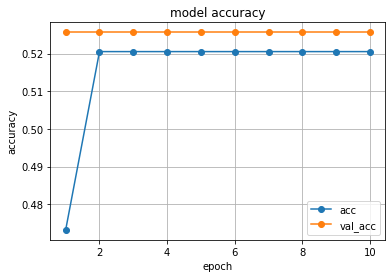

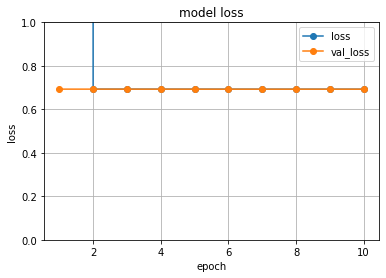

In [22]:
NUM_EPOCHS=len(df_trial)
plt.plot(range(1, NUM_EPOCHS+1), df_trial['acc'], "-o")
plt.plot(range(1, NUM_EPOCHS+1), df_trial['val_acc'], "-o")
plt.title('model accuracy')
plt.ylabel('accuracy')  # Y軸ラベル
plt.xlabel('epoch')  # X軸ラベル
plt.grid()
plt.legend(['acc', 'val_acc'], loc='best')
#plt.xlim(0,NUM_EPOCHS)
#plt.ylim(0.95,1.0)
plt.show()

plt.plot(range(1, NUM_EPOCHS+1), df_trial['loss'], "-o")
plt.plot(range(1, NUM_EPOCHS+1), df_trial['val_loss'], "-o")
plt.title('model loss')
plt.ylabel('loss')  # Y軸ラベル
plt.xlabel('epoch')  # X軸ラベル
plt.grid()
plt.legend(['loss', 'val_loss'], loc='best')
#plt.xlim(0,NUM_EPOCHS)
plt.ylim(0.0,1.0)
plt.show()

In [23]:
df_trial

,Unnamed: 0,loss,acc,val_loss,val_acc,Kernel,Conv2D,hidden01,epochs,Batch_size
0,0,711.420528,0.473186,0.692919,0.525641,14x8,16.0,10.0,10.0,128.0
1,1,0.692961,0.520505,0.692870,0.525641,14x8,16.0,10.0,10.0,128.0
2,2,0.692941,0.520505,0.692831,0.525641,14x8,16.0,10.0,10.0,128.0
3,3,0.692934,0.520505,0.692762,0.525641,14x8,16.0,10.0,10.0,128.0
4,4,0.692943,0.520505,0.692723,0.525641,NaN,NaN,NaN,NaN,NaN
5,5,0.692834,0.520505,0.692719,0.525641,NaN,NaN,NaN,NaN,NaN
6,6,0.692819,0.520505,0.692707,0.525641,NaN,NaN,NaN,NaN,NaN
7,7,0.692813,0.520505,0.692704,0.525641,NaN,NaN,NaN,NaN,NaN
8,8,0.692804,0.520505,0.692689,0.525641,NaN,NaN,NaN,NaN,NaN
9,9,0.692789,0.520505,0.692669,0.525641,NaN,NaN,NaN,NaN,NaN


In [24]:
df_trdes = df_trial.describe() 

In [25]:
df_trdes

,Unnamed: 0,loss,acc,val_loss,val_acc,Conv2D,hidden01,epochs,Batch_size
count,10.00000,10.000000,10.000000,10.000000,10.000000,4.0,4.0,4.0,4.0
mean,4.50000,71.765637,0.515773,0.692759,0.525641,16.0,10.0,10.0,128.0
std,3.02765,224.751819,0.014963,0.000085,0.000000,0.0,0.0,0.0,0.0
min,0.00000,0.692789,0.473186,0.692669,0.525641,16.0,10.0,10.0,128.0
25%,2.25000,0.692815,0.520505,0.692705,0.525641,16.0,10.0,10.0,128.0
50%,4.50000,0.692884,0.520505,0.692721,0.525641,16.0,10.0,10.0,128.0
75%,6.75000,0.692943,0.520505,0.692813,0.525641,16.0,10.0,10.0,128.0
max,9.00000,711.420528,0.520505,0.692919,0.525641,16.0,10.0,10.0,128.0


In [92]:
loss_minimam = []
val_loss_minimam = []
acc_maximam = []
val_acc_maximam = []
for var in range(960):
    filename = f'./validation/DFS_parameter/trial_{var}.csv'
    df_trial = pd.read_csv(filename)
    df_trdes = df_trial.describe() 
    loss_minimam.append(df_trdes.at["min", "loss"])
    val_loss_minimam.append(df_trdes.at["min", "val_loss"])
    acc_maximam.append(df_trdes.at["max", "acc"])
    val_acc_maximam.append(df_trdes.at["max", "val_acc"])
print(val_loss_minimam)
print(val_acc_maximam)

[0.5562435388565063, 0.6931471824645996, 0.6931471824645996, 0.6931471824645996, 0.6931471824645996, 0.6931471824645996, 0.6931471824645996, 0.6931471824645996, 0.6931471824645996, 0.6931471824645996, 0.6931471824645996, 0.6931471824645996, 0.6100110319944528, 0.6928483966069344, 0.6928797960281372, 0.6918870883110242, 0.6919224843000754, 0.6140508651733398, 0.31167281705599564, 0.6013346681228051, 0.3340342342853546, 0.6918771679584796, 0.4406004395240393, 0.6918761134147644, 0.6925548024666615, 0.6933502081112984, 0.6927356719970703, 0.39265593351461947, 0.6919226325475253, 0.633244514465332, 0.4786554926481002, 0.691884479461572, 0.6919252276420593, 0.6394731585796063, 0.3132885702145405, 0.6918730735778809, 0.6923444912983822, 0.6927162531094674, 0.584674060344696, 0.6918895764228625, 0.6919202025120075, 0.6918792128562927, 0.6395233609737494, 0.4627275264415986, 0.6918680667877197, 0.6918799174137604, 0.6918856440446316, 0.69187992811203, 0.6931471824645996, 0.6931471824645996, 0.

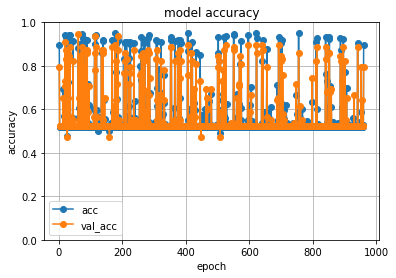

In [93]:
patterns=960
plt.plot(range(1, patterns+1), acc_maximam, "-o")
plt.plot(range(1, patterns+1), val_acc_maximam, "-o")
plt.title('model accuracy')
plt.ylabel('accuracy')  # Y軸ラベル
plt.xlabel('epoch')  # X軸ラベル
plt.grid()
plt.legend(['acc', 'val_acc'], loc='best')
#plt.xlim(0,patterns)
plt.ylim(0.0,1.0)
plt.show()



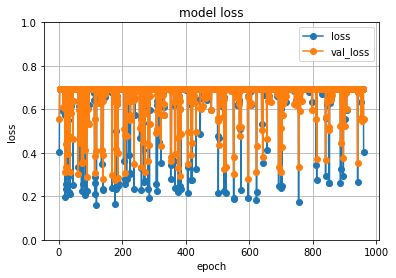

In [94]:
plt.plot(range(1, patterns+1), loss_minimam, "-o")
plt.plot(range(1, patterns+1), val_loss_minimam, "-o")
plt.title('model loss')
plt.ylabel('loss')  # Y軸ラベル
plt.xlabel('epoch')  # X軸ラベル
plt.grid()
plt.legend(['loss', 'val_loss'], loc='best')
#plt.xlim(0,patterns)
plt.ylim(0.0,1.0)
plt.show()

In [97]:
valo_mini = sorted(val_loss_minimam)
print(valo_mini)

[0.2768670985331902, 0.27733600980196244, 0.2810522577701471, 0.28621826187158245, 0.2907766829698514, 0.2955368161201477, 0.29823965560167265, 0.30123439278358066, 0.3013474979461768, 0.30821495331250703, 0.30942784593655515, 0.31015436618756026, 0.3115886151790619, 0.31167281705599564, 0.3132885702145405, 0.31374404827753705, 0.32763970585969776, 0.33245601371312755, 0.3327425985764235, 0.3336548048716325, 0.33398874486104035, 0.3340342342853546, 0.3341919680436452, 0.34936640698176163, 0.35032066932091344, 0.35126570669504315, 0.3536340907598153, 0.3574046591917674, 0.3628487220177284, 0.3629158567159604, 0.36873918771743774, 0.3696177273224562, 0.3748600956721184, 0.3793527483940125, 0.3820798099040985, 0.3829640715550154, 0.3849845314637209, 0.38939112424850464, 0.38970983028411865, 0.39265593351461947, 0.3939926532598642, 0.4013890326023102, 0.4086662592032017, 0.4108776175058805, 0.4141181646249233, 0.417203426361084, 0.4282383024692536, 0.4297653100429437, 0.43352842330932617, 

## 0 ~ 30 epochs

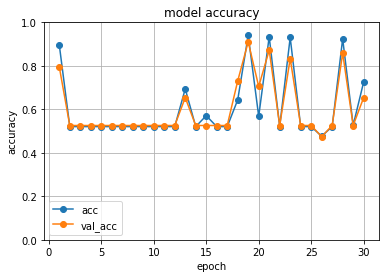

In [31]:
patterns=960
start = 0
width = 30
plt.plot(range(start+1, width+1), acc_maximam[start:start+width], "-o")
plt.plot(range(start+1, width+1), val_acc_maximam[start:start+width], "-o")
plt.title('model accuracy')
plt.ylabel('accuracy')  # Y軸ラベル
plt.xlabel('epoch')  # X軸ラベル
plt.grid()
plt.legend(['acc', 'val_acc'], loc='best')
#plt.xlim(0,patterns)
plt.ylim(0.0,1.0)
plt.show()

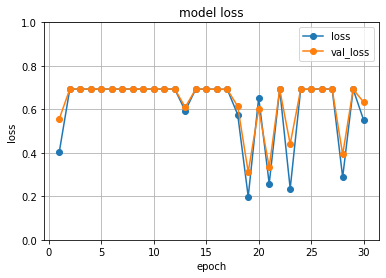

In [32]:
plt.plot(range(start+1, width+1), loss_minimam[start:start+width], "-o")
plt.plot(range(start+1,width+1), val_loss_minimam[start:start+width], "-o")
plt.title('model loss')
plt.ylabel('loss')  # Y軸ラベル
plt.xlabel('epoch')  # X軸ラベル
plt.grid()
plt.legend(['loss', 'val_loss'], loc='best')
#plt.xlim(0,patterns)
plt.ylim(0.0,1.0)
plt.show()

In [38]:
var = 20
filename = f'./validation/DFS_parameter/trial_{var}.csv'
df_trial02 = pd.read_csv(filename)

In [39]:
display(df_trial02)

,Unnamed: 0,loss,acc,val_loss,val_acc,Kernel,Conv2D,hidden01,epochs,Batch_size
0,0,0.850331,0.630915,0.591916,0.730769,14x4,3.0,3.0,200.0,128.0
1,1,0.646008,0.668770,0.506425,0.705128,14x4,3.0,3.0,200.0,128.0
2,2,0.568070,0.662461,0.533077,0.705128,14x4,3.0,3.0,200.0,128.0
3,3,0.525625,0.630915,0.438172,0.743590,14x4,3.0,3.0,200.0,128.0
4,4,0.520730,0.662461,0.593930,0.705128,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
195,195,0.268685,0.911672,0.405163,0.807692,NaN,NaN,NaN,NaN,NaN
196,196,0.260903,0.908517,0.547768,0.807692,NaN,NaN,NaN,NaN,NaN
197,197,0.258160,0.908517,0.598946,0.820513,NaN,NaN,NaN,NaN,NaN
198,198,0.307979,0.889590,0.575784,0.807692,NaN,NaN,NaN,NaN,NaN


In [37]:
display(df_trial02.iloc[])

SyntaxError: invalid syntax (<ipython-input-37-179628882ea1>, line 1)

# DFS-CNN

In [3]:
#num = 767
#filename = f'./validation/DFS_parameter/trial_{num}.csv'
#例として読み出し
filename = f'./fitting_model/DFS_parameters/CNN/trial_num767_i6_j16_k16_m128_n200.csv'
df_trial = pd.read_csv(filename)

In [4]:
df_trial

,Unnamed: 0,loss,acc,val_loss,val_acc,Kernel,Conv2D,hidden01,epochs,Batch_size
0,0,44.221284,0.545741,0.693389,0.474359,14x6,16.0,16.0,128.0,200.0
1,1,0.673837,0.542587,10.203819,0.525641,14x6,16.0,16.0,128.0,200.0
2,2,4.732319,0.473186,0.693678,0.474359,14x6,16.0,16.0,128.0,200.0
3,3,0.693572,0.479495,0.693628,0.474359,14x6,16.0,16.0,128.0,200.0
4,4,0.693540,0.479495,0.693552,0.474359,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
195,195,0.692317,0.520505,0.691934,0.525641,NaN,NaN,NaN,NaN,NaN
196,196,0.692318,0.520505,0.691933,0.525641,NaN,NaN,NaN,NaN,NaN
197,197,0.692352,0.520505,0.691926,0.525641,NaN,NaN,NaN,NaN,NaN
198,198,0.692314,0.520505,0.691928,0.525641,NaN,NaN,NaN,NaN,NaN


In [5]:
df_trdes = df_trial.describe()

In [6]:
df_trdes

,Unnamed: 0,loss,acc,val_loss,val_acc,Conv2D,hidden01,epochs,Batch_size
count,200.000000,200.000000,200.000000,200.000000,200.000000,4.0,4.0,4.0,4.0
mean,99.500000,0.930273,0.518123,0.739810,0.522308,16.0,16.0,128.0,200.0
std,57.879185,3.089753,0.010362,0.672569,0.012674,0.0,0.0,0.0,0.0
min,0.000000,0.673837,0.473186,0.691913,0.474359,16.0,16.0,128.0,200.0
25%,49.750000,0.692328,0.520505,0.691945,0.525641,16.0,16.0,128.0,200.0
50%,99.500000,0.692375,0.520505,0.692039,0.525641,16.0,16.0,128.0,200.0
75%,149.250000,0.692616,0.520505,0.692440,0.525641,16.0,16.0,128.0,200.0
max,199.000000,44.221284,0.545741,10.203819,0.525641,16.0,16.0,128.0,200.0


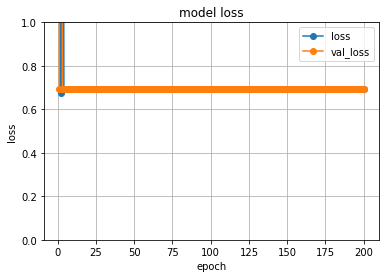

In [7]:
#patterns=
epochs = 200
plt.plot(range(1, epochs+1), df_trial.iloc[:, 1], "-o")
plt.plot(range(1, epochs+1), df_trial.iloc[:, 3], "-o")
plt.title('model loss')
plt.ylabel('loss')  # Y軸ラベル
plt.xlabel('epoch')  # X軸ラベル
plt.grid()
plt.legend(['loss', 'val_loss'], loc='best')
#plt.xlim(0,patterns)
plt.ylim(0.0,1.0)
plt.show()

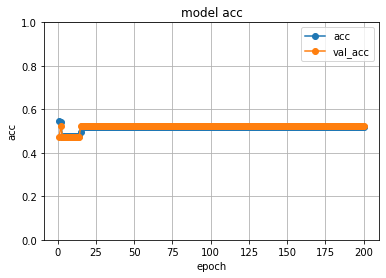

In [8]:
#patterns=
epochs = 200
plt.plot(range(1, epochs+1), df_trial.iloc[:, 2], "-o")
plt.plot(range(1, epochs+1), df_trial.iloc[:, 4], "-o")
plt.title('model acc')
plt.ylabel('acc')  # Y軸ラベル
plt.xlabel('epoch')  # X軸ラベル
plt.grid()
plt.legend(['acc', 'val_acc'], loc='best')
#plt.xlim(0,patterns)
plt.ylim(0.0,1.0)
plt.show()

# 分析用リスト作成

In [101]:
loss_min_list = []
val_loss_min_list = []

acc_max_list = []
val_acc_max_list = []

num = 0
for i in [3, 4, 5, 6]:
    for j in [3, 5, 10, 16]:
        for k in [3, 5, 10, 16]: 
            for m in [32, 64, 128]:
                for n in [10, 50, 100, 200]: 
                    filename = f'./fitting_model/DFS_parameters/CNN/trial_num{num}_i{i}_j{j}_k{k}_m{m}_n{n}.csv'
                    df_trial = pd.read_csv(filename)
                    df_trdes = df_trial.describe()
                    loss_min_list.append(df_trdes.at["min", "loss"])
                    val_loss_min_list.append(df_trdes.at["min", "val_loss"])
                    acc_max_list.append(df_trdes.at["max", "acc"])
                    val_acc_max_list.append(df_trdes.at["max", "val_acc"])
                    #if df_trdes.at["min", "val_loss"] == min(val_loss_min_list):
                    #    print(num)
                    #    print(i)
                    #    print(j)
                    #    print(k)
                    #    print(m)
                    #    print(n)
                    #    print("--------------")
                    num = num+ 1


# リストを分析する．

In [100]:
#loss_min_list = []
#val_loss_min_list = []

#acc_max_list = []
#val_acc_max_list = []

num = 0
for i in [3, 4, 5, 6]:
    for j in [3, 5, 10, 16]:
        for k in [3, 5, 10, 16]: 
            for m in [32, 64, 128]:
                for n in [10, 50, 100, 200]: 
                    filename = f'../fitting_model/DFS_parameters/CNN/trial_num{num}_i{i}_j{j}_k{k}_m{m}_n{n}.csv'
                    df_trial = pd.read_csv(filename)
                    df_trdes = df_trial.describe()
                    #loss_min_list.append(df_trdes.at["min", "loss"])
                    #val_loss_min_list.append(df_trdes.at["min", "val_loss"])
                    #acc_max_list.append(df_trdes.at["max", "acc"])
                    #val_acc_max_list.append(df_trdes.at["max", "val_acc"])
                    if df_trdes.at["min", "val_loss"] == min(val_loss_min_list):
                        print(num)
                        print(i)
                        print(j)
                        print(k)
                        print(m)
                        print(n)
                        print("--------------")
                    num = num+ 1


ValueError: min() arg is an empty sequence

https://note.nkmk.me/python-max-min-heapq-nlargest-nsmallest/<br>
https://note.nkmk.me/python-list-index/

In [102]:
print(min(loss_min_list))

0.13227240322892225


In [103]:
print(loss_min_list)

[0.4196632906841555, 0.6923492342139644, 0.6923233475594867, 0.6923189202693735, 0.5942533450547829, 0.6923997347663253, 0.6923181047951009, 0.6923084484665928, 0.6104074586829177, 0.6925807597133263, 0.6923736354530046, 0.28305600987811946, 0.6927071341580773, 0.6923333519264726, 0.6902659565492383, 0.6923150768039354, 0.6929639218733514, 0.6923393569534133, 0.25181190890468635, 0.6923095138291079, 0.6926624786214498, 0.692554810069713, 0.6923087019273535, 0.6095482285842535, 0.5886271024351992, 0.6923495237759612, 0.6923340991468461, 0.6923247517471434, 0.6926745360582033, 0.610090317786304, 0.6923145586007777, 0.2269384264475916, 0.5739148905976713, 0.6923861129426806, 0.6923598696004705, 0.6923063784743709, 0.5977392480576452, 0.6923307471846932, 0.674226086222411, 0.6923249016048778, 0.6926169777142137, 0.6924094341530784, 0.6923124444221472, 0.6923083373424759, 0.6930012811997711, 0.6925025636841446, 0.6923547992570919, 0.6923076775547834, 0.4898049263548024, 0.3629026862349044, 

In [104]:
ld0 = sorted(loss_min_list)
print(ld0)

[0.13227240322892225, 0.18716284801907346, 0.20636328227512468, 0.210772180453836, 0.21399097736889636, 0.21615283369829974, 0.22288087917615187, 0.22446017056609555, 0.22504485809840616, 0.2269384264475916, 0.22879366882215915, 0.23105333938207534, 0.2319441380372935, 0.23265517848523254, 0.2328540619803528, 0.2329997172114977, 0.2342033355205969, 0.2360736457425337, 0.2363997996323492, 0.2386247809941084, 0.23946152274916974, 0.2396832840863839, 0.2419128628089225, 0.2441967055436565, 0.24532815296943256, 0.2462418663200896, 0.24895936090863466, 0.2506950967695435, 0.2511050965319673, 0.2512011690658726, 0.25181190890468635, 0.2540617603984917, 0.2559241352115144, 0.25744365038179823, 0.25997559312578256, 0.2611104807455081, 0.265521467296107, 0.2657422692241729, 0.2721862852667408, 0.27407266096173777, 0.2756098805447858, 0.2757211371269136, 0.2774717975114046, 0.2775956640484205, 0.2778704131627309, 0.2800159517334839, 0.28305600987811946, 0.2833078762616269, 0.2868024547017335, 0.

In [105]:
print(loss_min_list.index(ld0[0]))

135


num=135はファイル名を確認すると，（i4j10k10m100n32）である．
trial_num135_i3_j10_k16_m32_n200.csv

In [106]:
print(min(val_loss_min_list))

0.2510788833292631


In [107]:
ld1 = sorted(val_loss_min_list)
print(ld1)

[0.2510788833292631, 0.2541864571663049, 0.2729938106659131, 0.2760132963840778, 0.2784391045570373, 0.2831202309865218, 0.2833188818051265, 0.3193967491388321, 0.3364303792134309, 0.33718899274483705, 0.3517849880915422, 0.353390620304988, 0.3632038503121107, 0.3652885258197784, 0.36663515598346025, 0.3690300438648615, 0.3699794113636017, 0.3703143887030773, 0.373792976140976, 0.3780928865457193, 0.37935525178909296, 0.38181322507369214, 0.3830400407314301, 0.3894862998754551, 0.3911474859103177, 0.4028634902758476, 0.4076216927705667, 0.4127609561651181, 0.4139617085456848, 0.4140521471316998, 0.4186035776749635, 0.41904497834352333, 0.4195524018544417, 0.4212635969504332, 0.4261104525663914, 0.42784600532971895, 0.4286469221115112, 0.43491935959229105, 0.43622271372721744, 0.4414948339645679, 0.4420168101787567, 0.44260406723389256, 0.4430970862889901, 0.44608458876609797, 0.4468582272529602, 0.4471708834171295, 0.449072050742614, 0.4508351003512358, 0.4520722925662994, 0.4544566044

In [108]:
print(val_loss_min_list.index(ld1[0]))

111


num=111, trial_num111_i3_j10_k5_m32_n200.csv<br>
cnn_search_protease/data_preprocessing/fitting_model/DFS_parameters/CNN/

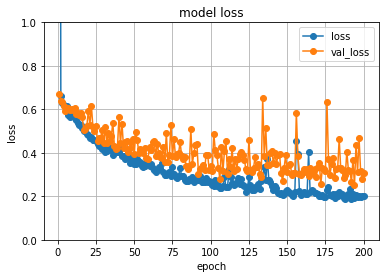

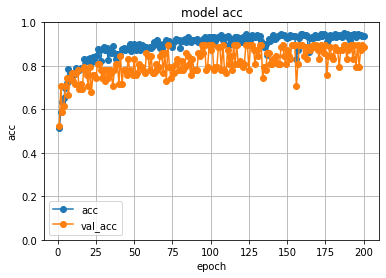

In [114]:
filename = f'./fitting_model/DFS_parameters/CNN/trial_num111_i3_j10_k5_m32_n200.csv'
df_trial = pd.read_csv(filename)
df_trial
df_trdes = df_trial.describe()
df_trdes

#patterns=
epochs = 200
plt.plot(range(1, epochs+1), df_trial.iloc[:, 1], "-o")
plt.plot(range(1, epochs+1), df_trial.iloc[:, 3], "-o")
plt.title('model loss')
plt.ylabel('loss')  # Y軸ラベル
plt.xlabel('epoch')  # X軸ラベル
plt.grid()
plt.legend(['loss', 'val_loss'], loc='best')
#plt.xlim(0,patterns)
plt.ylim(0.0,1.0)
plt.show()

#patterns=
epochs = 200
plt.plot(range(1, epochs+1), df_trial.iloc[:, 2], "-o")
plt.plot(range(1, epochs+1), df_trial.iloc[:, 4], "-o")
plt.title('model acc')
plt.ylabel('acc')  # Y軸ラベル
plt.xlabel('epoch')  # X軸ラベル
plt.grid()
plt.legend(['acc', 'val_acc'], loc='best')
#plt.xlim(0,patterns)
plt.ylim(0.0,1.0)
plt.show()

In [109]:
print(val_loss_min_list.index(ld1[1]))

350


num=350, trial_num350_i4_j16_k5_m32_n100.csv

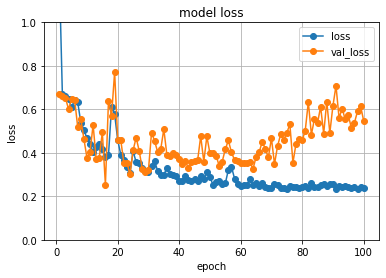

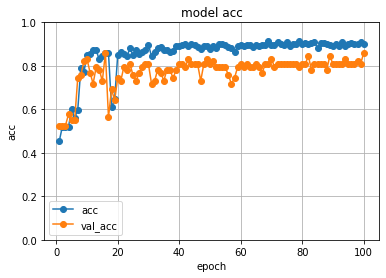

In [117]:
filename = f'./fitting_model/DFS_parameters/CNN/trial_num350_i4_j16_k5_m32_n100.csv'
df_trial = pd.read_csv(filename)
df_trial
df_trdes = df_trial.describe()
df_trdes

#patterns=
epochs = 100
plt.plot(range(1, epochs+1), df_trial.iloc[:, 1], "-o")
plt.plot(range(1, epochs+1), df_trial.iloc[:, 3], "-o")
plt.title('model loss')
plt.ylabel('loss')  # Y軸ラベル
plt.xlabel('epoch')  # X軸ラベル
plt.grid()
plt.legend(['loss', 'val_loss'], loc='best')
#plt.xlim(0,patterns)
plt.ylim(0.0,1.0)
plt.show()

#patterns=

plt.plot(range(1, epochs+1), df_trial.iloc[:, 2], "-o")
plt.plot(range(1, epochs+1), df_trial.iloc[:, 4], "-o")
plt.title('model acc')
plt.ylabel('acc')  # Y軸ラベル
plt.xlabel('epoch')  # X軸ラベル
plt.grid()
plt.legend(['acc', 'val_acc'], loc='best')
#plt.xlim(0,patterns)
plt.ylim(0.0,1.0)
plt.show()

In [110]:
print(val_loss_min_list.index(ld1[2]))

319


num=319, trial_num319_i4_j10_k10_m64_n200.csv

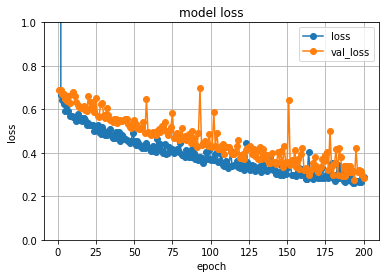

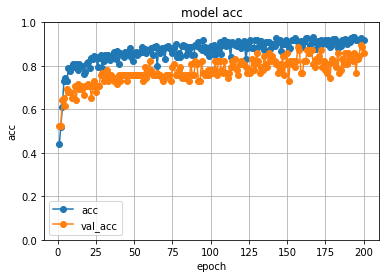

In [118]:
filename = f'./fitting_model/DFS_parameters/CNN/trial_num319_i4_j10_k10_m64_n200.csv'
df_trial = pd.read_csv(filename)
df_trial
df_trdes = df_trial.describe()
df_trdes

#patterns=
epochs = 200
plt.plot(range(1, epochs+1), df_trial.iloc[:, 1], "-o")
plt.plot(range(1, epochs+1), df_trial.iloc[:, 3], "-o")
plt.title('model loss')
plt.ylabel('loss')  # Y軸ラベル
plt.xlabel('epoch')  # X軸ラベル
plt.grid()
plt.legend(['loss', 'val_loss'], loc='best')
#plt.xlim(0,patterns)
plt.ylim(0.0,1.0)
plt.show()

#patterns=

plt.plot(range(1, epochs+1), df_trial.iloc[:, 2], "-o")
plt.plot(range(1, epochs+1), df_trial.iloc[:, 4], "-o")
plt.title('model acc')
plt.ylabel('acc')  # Y軸ラベル
plt.xlabel('epoch')  # X軸ラベル
plt.grid()
plt.legend(['acc', 'val_acc'], loc='best')
#plt.xlim(0,patterns)
plt.ylim(0.0,1.0)
plt.show()

In [111]:
print(val_loss_min_list.index(ld1[3]))

305


num=305, trial_num305_i4_j10_k5_m64_n50.csv

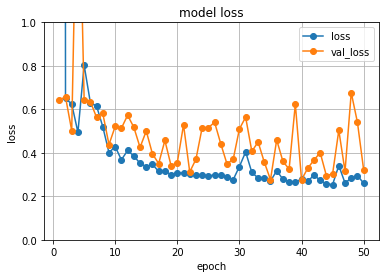

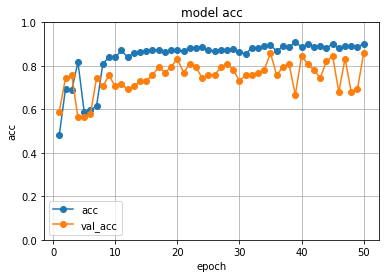

In [120]:
filename = f'./fitting_model/DFS_parameters/CNN/trial_num305_i4_j10_k5_m64_n50.csv'
df_trial = pd.read_csv(filename)
df_trial
df_trdes = df_trial.describe()
df_trdes

#patterns=
epochs = 50
plt.plot(range(1, epochs+1), df_trial.iloc[:, 1], "-o")
plt.plot(range(1, epochs+1), df_trial.iloc[:, 3], "-o")
plt.title('model loss')
plt.ylabel('loss')  # Y軸ラベル
plt.xlabel('epoch')  # X軸ラベル
plt.grid()
plt.legend(['loss', 'val_loss'], loc='best')
#plt.xlim(0,patterns)
plt.ylim(0.0,1.0)
plt.show()

#patterns=

plt.plot(range(1, epochs+1), df_trial.iloc[:, 2], "-o")
plt.plot(range(1, epochs+1), df_trial.iloc[:, 4], "-o")
plt.title('model acc')
plt.ylabel('acc')  # Y軸ラベル
plt.xlabel('epoch')  # X軸ラベル
plt.grid()
plt.legend(['acc', 'val_acc'], loc='best')
#plt.xlim(0,patterns)
plt.ylim(0.0,1.0)
plt.show()

In [112]:
print(val_loss_min_list.index(ld1[4]))

302


num=302, trial_num302_i4_j10_k5_m32_n100.csv

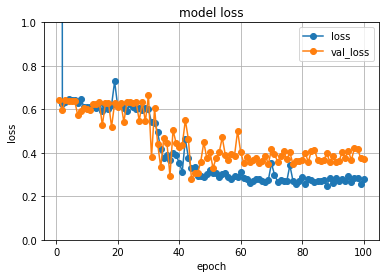

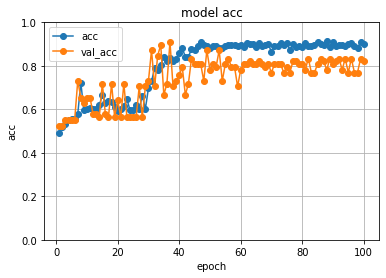

In [121]:
filename = f'./fitting_model/DFS_parameters/CNN/trial_num302_i4_j10_k5_m32_n100.csv'
df_trial = pd.read_csv(filename)
df_trial
df_trdes = df_trial.describe()
df_trdes

#patterns=
epochs = 100
plt.plot(range(1, epochs+1), df_trial.iloc[:, 1], "-o")
plt.plot(range(1, epochs+1), df_trial.iloc[:, 3], "-o")
plt.title('model loss')
plt.ylabel('loss')  # Y軸ラベル
plt.xlabel('epoch')  # X軸ラベル
plt.grid()
plt.legend(['loss', 'val_loss'], loc='best')
#plt.xlim(0,patterns)
plt.ylim(0.0,1.0)
plt.show()

#patterns=

plt.plot(range(1, epochs+1), df_trial.iloc[:, 2], "-o")
plt.plot(range(1, epochs+1), df_trial.iloc[:, 4], "-o")
plt.title('model acc')
plt.ylabel('acc')  # Y軸ラベル
plt.xlabel('epoch')  # X軸ラベル
plt.grid()
plt.legend(['acc', 'val_acc'], loc='best')
#plt.xlim(0,patterns)
plt.ylim(0.0,1.0)
plt.show()

In [13]:
print(max(acc_max_list))

0.9526813626289368


In [30]:
ld2 = sorted(acc_max_list, reverse=True)
print(ld2)

[0.9526813626289368, 0.9432176947593688, 0.9369085431098938, 0.9337539672851562, 0.9337539672851562, 0.9305993914604188, 0.9305993914604188, 0.9305993914604188, 0.9305993914604188, 0.9274448156356812, 0.9274448156356812, 0.9274448156356812, 0.9274448156356812, 0.9242902398109436, 0.9242902398109436, 0.9242902398109436, 0.9242902398109436, 0.9242902398109436, 0.9242902398109436, 0.9242902398109436, 0.9242902398109436, 0.9242902398109436, 0.9242902398109436, 0.9211356639862059, 0.9211356639862059, 0.9179810881614684, 0.9179810881614684, 0.9179810881614684, 0.9179810881614684, 0.9179810881614684, 0.9179810881614684, 0.9179810881614684, 0.914826512336731, 0.914826512336731, 0.914826512336731, 0.914826512336731, 0.914826512336731, 0.914826512336731, 0.914826512336731, 0.914826512336731, 0.9116719365119934, 0.9116719365119934, 0.908517360687256, 0.908517360687256, 0.908517360687256, 0.908517360687256, 0.908517360687256, 0.908517360687256, 0.908517360687256, 0.908517360687256, 0.9085173606872

In [31]:
print(acc_max_list.index(ld2[0]))

111


In [33]:
print(max(val_acc_max_list))

0.9102563858032228


In [35]:
ld3 = sorted(val_acc_max_list, reverse=True)
print(ld3)

[0.9102563858032228, 0.8974359035491943, 0.8974359035491943, 0.8846153616905212, 0.8846153616905212, 0.8846153616905212, 0.8846153616905212, 0.8846153616905212, 0.8717948794364929, 0.8717948794364929, 0.8717948794364929, 0.8717948794364929, 0.8717948794364929, 0.8717948794364929, 0.8589743375778198, 0.8589743375778198, 0.8589743375778198, 0.8589743375778198, 0.8589743375778198, 0.8589743375778198, 0.8589743375778198, 0.8589743375778198, 0.8589743375778198, 0.8589743375778198, 0.8589743375778198, 0.8589743375778198, 0.8589743375778198, 0.8589743375778198, 0.8589743375778198, 0.8461538553237915, 0.8461538553237915, 0.8461538553237915, 0.8461538553237915, 0.8461538553237915, 0.8461538553237915, 0.8461538553237915, 0.8461538553237915, 0.8461538553237915, 0.8461538553237915, 0.8461538553237915, 0.8461538553237915, 0.8461538553237915, 0.8461538553237915, 0.8333333134651184, 0.8333333134651184, 0.8333333134651184, 0.8333333134651184, 0.8333333134651184, 0.8333333134651184, 0.8333333134651184,

In [36]:
print(val_acc_max_list.index(ld3[0]))

302


In [15]:
for i in range(len(val_loss_min_list)):
    if val_loss_min_list[i] == min(val_loss_min_list):
        print(i)

111


In [20]:
print(len(loss_min_list))
print(len(val_loss_min_list))

768
768


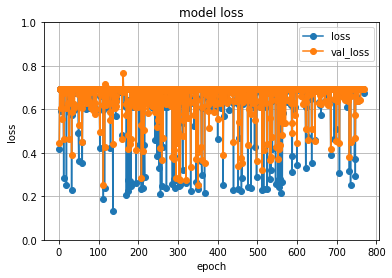

In [21]:
patterns=768
#epochs = 200
plt.plot(range(1, patterns+1), loss_min_list, "-o")
plt.plot(range(1, patterns+1), val_loss_min_list, "-o")
plt.title('model loss')
plt.ylabel('loss')  # Y軸ラベル
plt.xlabel('epoch')  # X軸ラベル
plt.grid()
plt.legend(['loss', 'val_loss'], loc='best')
#plt.xlim(0,patterns)
plt.ylim(0.0,1.0)
plt.show()

# val_loss最小のパラメータで計算する．

In [3]:
# val_loss = 0.2510788833292631で最小のパラメータたち
#trial_num111_i3_j10_k5_m32_n200.csv
num = 111
i = 3
j = 10
k = 5
m = 32
n = 200
'''
111
3
10
5
32
200
'''
filename = f'./fitting_model/DFS_parameters/CNN/trial_num{num}_i{i}_j{j}_k{k}_m{m}_n{n}.csv'
df_trial = pd.read_csv(filename)

In [4]:
df_trial

,Unnamed: 0,loss,acc,val_loss,val_acc,Kernel,Conv2D,hidden01,epochs,Batch_size
0,0,4.899757,0.514196,0.669259,0.525641,14x3,10.0,5.0,32.0,200.0
1,1,0.660220,0.589905,0.638695,0.705128,14x3,10.0,5.0,32.0,200.0
2,2,0.630465,0.634069,0.632947,0.589744,14x3,10.0,5.0,32.0,200.0
3,3,0.618380,0.652997,0.616669,0.615385,14x3,10.0,5.0,32.0,200.0
4,4,0.615747,0.697161,0.593425,0.705128,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
195,195,0.195315,0.946372,0.310710,0.897436,NaN,NaN,NaN,NaN,NaN
196,196,0.200917,0.943218,0.467235,0.794872,NaN,NaN,NaN,NaN,NaN
197,197,0.198559,0.943218,0.317342,0.871795,NaN,NaN,NaN,NaN,NaN
198,198,0.201989,0.936909,0.278263,0.897436,NaN,NaN,NaN,NaN,NaN


In [5]:
df_trdes = df_trial.describe()

In [6]:
df_trdes

,Unnamed: 0,loss,acc,val_loss,val_acc,Conv2D,hidden01,epochs,Batch_size
count,200.000000,200.000000,200.000000,200.000000,200.000000,4.0,4.0,4.0,4.0
mean,99.500000,0.334944,0.894117,0.406277,0.814679,10.0,5.0,32.0,200.0
std,57.879185,0.342175,0.064548,0.095501,0.064581,0.0,0.0,0.0,0.0
min,0.000000,0.187163,0.514196,0.251079,0.525641,10.0,5.0,32.0,200.0
25%,49.750000,0.226630,0.879338,0.327746,0.782051,10.0,5.0,32.0,200.0
50%,99.500000,0.277870,0.916404,0.388743,0.807692,10.0,5.0,32.0,200.0
75%,149.250000,0.371529,0.933754,0.455904,0.871795,10.0,5.0,32.0,200.0
max,199.000000,4.899757,0.952681,0.669259,0.897436,10.0,5.0,32.0,200.0


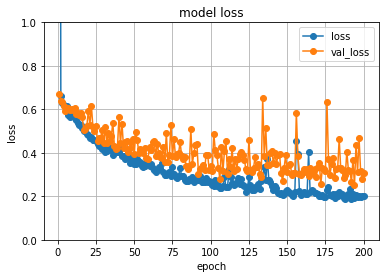

In [7]:
#patterns=
epochs = n
plt.plot(range(1, epochs+1), df_trial.iloc[:, 1], "-o")
plt.plot(range(1, epochs+1), df_trial.iloc[:, 3], "-o")
plt.title('model loss')
plt.ylabel('loss')  # Y軸ラベル
plt.xlabel('epoch')  # X軸ラベル
plt.grid()
plt.legend(['loss', 'val_loss'], loc='best')
#plt.xlim(0,patterns)
plt.ylim(0.0,1.0)
plt.show()

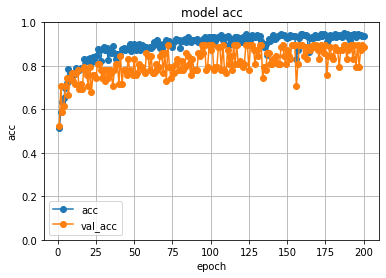

In [8]:
#patterns=
epochs = n
plt.plot(range(1, epochs+1), df_trial.iloc[:, 2], "-o")
plt.plot(range(1, epochs+1), df_trial.iloc[:, 4], "-o")
plt.title('model acc')
plt.ylabel('acc')  # Y軸ラベル
plt.xlabel('epoch')  # X軸ラベル
plt.grid()
plt.legend(['acc', 'val_acc'], loc='best')
#plt.xlim(0,patterns)
plt.ylim(0.0,1.0)
plt.show()

この様子を見ると，300までepochsを増やしてみたい．

Saved trained model at ../model_saving/DFS_parameter/20220729-184828(num:111) (num:111)

In [ ]:
#Saved trained model at ../model_saving/DFS_parameter/FC/20220731-170204_num111 (num:111)
#20220729-184828(num:111)
#20220729-184828num111

In [46]:
model = load_model("./saving_model/DFS_parameter")

OSError: SavedModel file does not exist at: ../model_saving/DFS_parameter/{saved_model.pbtxt|saved_model.pb}

# モデルが読み込めないので，計算し直す．

In [40]:
# DFS for parameters in test case.
#訓練データ
x_train = x_train_all
y_train = y_train_all

#検証データ
x_val = x_train_all_5crossval 
y_val = y_train_all_5crossval 


#old_session = KTF.get_session()
#session = tf.Session('')
#KTF.set_session(session)
#KTF.set_learning_phase(1)
#960 patterns, 当初は768 patterns



num = 111
i = 3
j = 10
k = 5
m = 32
n = 200

#modelの定義の前に重みのリセットが必要で，これ？
tf.compat.v1.Session()
#sess = tf.compat.v1.Session()
#モデル構築
model = Sequential()
model.add(Conv2D(filters=j, kernel_size=(14, i), strides=(1, 1), padding='valid', 
                 data_format="channels_last", dilation_rate=(1, 1), activation='relu', 
                 use_bias=True, input_shape=(14, 8, 1), kernel_initializer='glorot_uniform', 
                 bias_initializer='zeros',  name='Conv2D_01'))
#model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None, 
#                       name='MaxPooling2D_01'))
model.add(Flatten(name='Flatten_01'))
#model.add(Dropout(0.50))
model.add(Dense(units=k, name='Denese_01', activation='relu'))
#model.add(Dense(units=50, name='Dense_01', activation='relu')
#model.add(Dense(units=10, name='Denese_03', activation='relu'))
model.add(Dense(units=2, name='Dense_out'))
model.add(Activation('softmax'))

#モデルの構造を表示
model.summary()

#訓練（学習）プロセスの設定
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])



#バリデーションロスが減少した場合に，各エポック終了後，モデルの重みを保存します
#checkpointer = ModelCheckpoint(filepath='./weights.hdf5', verbose=0, save_best_only=True, save_format="h5")
### add for TensorBoard
erly_stpg = EarlyStopping(patience=10, verbose=1,monitor='val_loss' , mode = 'min') 
chkfile = '../callbacks/' + '{0:2d}'.format(Vernum)+'_{epoch:02d}-{val_loss:.4f}.hdf5' #format関数
check_point = ModelCheckpoint(filepath = chkfile, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
check_point = [check_point]

log_dir = "log/" + datetime.datetime.now().strftime(f"%Y%m%d-%H%M%S_num{num}")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
cbks=[tensorboard_callback]

#訓練の実行 
NUM_BATCH=m
NUM_EPOCHS=n
#history = model.fit(x_train, y_train, batch_size=NUM_BATCH, epochs=NUM_EPOCHS, validation_split=0.2, shuffle = True ,
#                    callbacks=[erly_stpg , chck_pont], verbose = 0, )
history = model.fit(x_train, y_train, batch_size=NUM_BATCH, epochs=NUM_EPOCHS, 
                     shuffle = True, verbose = 0,
                    callbacks=check_point,
                   validation_data=(x_val, y_val))


#saving the model.you can use the
save_dir = "./saving_model/DFS_parameter/CNN/"
model_name = datetime.datetime.now().strftime("%Y%m%d-%H%M%S"+f"_num{num}_recalculation")
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print(f'Saved trained model at %s num{num}' % model_path)

df1 = pd.DataFrame(
    data={'loss':history.history['loss'], 
          'acc':history.history['acc'],
          'val_loss':history.history['val_loss'], 
          'val_acc':history.history['val_acc']
         }, 
    index=np.arange(0, NUM_EPOCHS)
)

df1

df2 = pd.DataFrame(
    data={'Kernel':f'14x{i}',
         'Conv2D':str(j),
         'hidden01':str(k),
         'epochs':str(m),
         'Batch_size':str(n)}, 
    index=np.arange(4)
)
df2
print(pd.concat([df1, df2], axis=1))
df3 = pd.concat([df1, df2], axis=1)
print(f'num: {num}')
filename = f'./fitting_model/DFS_parameters/CNN/trial_num{num}_i{i}_j{j}_k{k}_m{m}_n{n}.csv'
df3.to_csv(filename)
print(filename)

print(f'{num} calculation ends.')
print(f'i: {i}')
print(f'j: {j}')
print(f'k: {k}')
print(f'm: {m}')
print(f'n: {n}')

num = num + 1
print("----------------------------------------------------")
#print(type(history))
#print(type(history.history))
#print(history.history.keys())
#print(history.history['loss'])
#print(history.history['acc'])
#print(history.history['val_loss'])
#print(history.history['val_acc'])
print("END")

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D_01 (Conv2D)           (None, 1, 6, 10)          430       
_________________________________________________________________
Flatten_01 (Flatten)         (None, 60)                0         
_________________________________________________________________
Denese_01 (Dense)            (None, 5)                 305       
_________________________________________________________________
Dense_out (Dense)            (None, 2)                 12        
_________________________________________________________________
activation_9 (Activation)    (None, 2)                 0         
Total params: 747
Trainable params: 747
Non-trainable params: 0
_________________________________________________________________

Epoch 00001: val_loss improved from inf to 0.68051, saving model to ../callbacks/99_01-0.6805.hdf5

Epoch 00002: val_loss


Epoch 00125: val_loss did not improve from 0.33638

Epoch 00126: val_loss did not improve from 0.33638

Epoch 00127: val_loss did not improve from 0.33638

Epoch 00128: val_loss did not improve from 0.33638

Epoch 00129: val_loss did not improve from 0.33638

Epoch 00130: val_loss did not improve from 0.33638

Epoch 00131: val_loss did not improve from 0.33638

Epoch 00132: val_loss did not improve from 0.33638

Epoch 00133: val_loss did not improve from 0.33638

Epoch 00134: val_loss did not improve from 0.33638

Epoch 00135: val_loss did not improve from 0.33638

Epoch 00136: val_loss did not improve from 0.33638

Epoch 00137: val_loss did not improve from 0.33638

Epoch 00138: val_loss did not improve from 0.33638

Epoch 00139: val_loss did not improve from 0.33638

Epoch 00140: val_loss did not improve from 0.33638

Epoch 00141: val_loss did not improve from 0.33638

Epoch 00142: val_loss did not improve from 0.33638

Epoch 00143: val_loss did not improve from 0.33638

Epoch 00144

In [48]:
print(pd.concat([df1, df2], axis=1))
df3 = pd.concat([df1, df2], axis=1)

         loss       acc  val_loss   val_acc Kernel Conv2D hidden01 Batch_size  \
0    2.447627  0.539432  0.680512  0.525641   14x4      3        0         32   
1    0.679021  0.520505  0.666223  0.525641   14x4      3        0         32   
2    0.651893  0.520505  0.625293  0.525641   14x4      3        0         32   
3    0.591467  0.684543  0.589756  0.692308   14x4      3        0         32   
4    0.571607  0.766562  0.613839  0.628205    NaN    NaN      NaN        NaN   
..        ...       ...       ...       ...    ...    ...      ...        ...   
195  0.195154  0.933754  0.394631  0.871795    NaN    NaN      NaN        NaN   
196  0.166965  0.940063  0.396760  0.858974    NaN    NaN      NaN        NaN   
197  0.179270  0.949527  0.467494  0.858974    NaN    NaN      NaN        NaN   
198  0.174281  0.943218  0.397404  0.884615    NaN    NaN      NaN        NaN   
199  0.183835  0.943218  0.520564  0.884615    NaN    NaN      NaN        NaN   

    epochs  
0      100  
1

In [51]:
var = "CNN_various_05"
filename = f'./fitting_model/DFS_parameters/CNN/trial_{var}.csv'
df3.to_csv(filename)

In [3]:
var = "CNN_various_05"
df = pd.read_csv(f'./fitting_model/DFS_parameters/CNN/trial_{var}.csv')

In [4]:
df

,Unnamed: 0,loss,acc,val_loss,val_acc,Kernel,Conv2D,hidden01,Batch_size,epochs
0,0,2.447627,0.539432,0.680512,0.525641,14x4,3.0,0.0,32.0,100.0
1,1,0.679021,0.520505,0.666223,0.525641,14x4,3.0,0.0,32.0,100.0
2,2,0.651893,0.520505,0.625293,0.525641,14x4,3.0,0.0,32.0,100.0
3,3,0.591467,0.684543,0.589756,0.692308,14x4,3.0,0.0,32.0,100.0
4,4,0.571607,0.766562,0.613839,0.628205,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
195,195,0.195154,0.933754,0.394631,0.871795,NaN,NaN,NaN,NaN,NaN
196,196,0.166965,0.940063,0.396760,0.858974,NaN,NaN,NaN,NaN,NaN
197,197,0.179270,0.949527,0.467494,0.858974,NaN,NaN,NaN,NaN,NaN
198,198,0.174281,0.943218,0.397404,0.884615,NaN,NaN,NaN,NaN,NaN


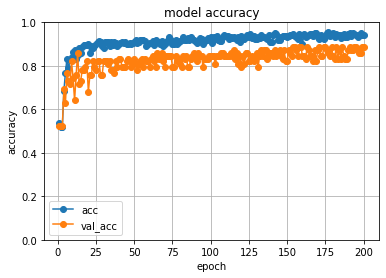

In [52]:
plt.plot(range(1, NUM_EPOCHS+1), df3['acc'], "-o")
plt.plot(range(1, NUM_EPOCHS+1), df3['val_acc'], "-o")
plt.title('model accuracy')
plt.ylabel('accuracy')  # Y軸ラベル
plt.xlabel('epoch')  # X軸ラベル
plt.grid()
plt.legend(['acc', 'val_acc'], loc='best')
#plt.xlim(0,NUM_EPOCHS)
plt.ylim(0.0,1.0)
plt.show()

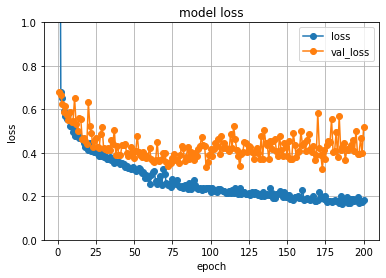

In [54]:
plt.plot(range(1, NUM_EPOCHS+1), df3['loss'], "-o")
plt.plot(range(1, NUM_EPOCHS+1), df3['val_loss'], "-o")
plt.title('model loss')
plt.ylabel('loss')  # Y軸ラベル
plt.xlabel('epoch')  # X軸ラベル
plt.grid()
plt.legend(['loss', 'val_loss'], loc='best')
#plt.xlim(0,NUM_EPOCHS)
plt.ylim(0.0,1.0)
plt.show()

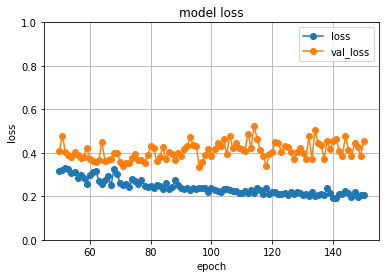

In [59]:
plt.plot(range(50, 150+1), df3.iloc[50:151, 0], "-o")
plt.plot(range(50, 150+1), df3.iloc[50:151, 2], "-o")
plt.title('model loss')
plt.ylabel('loss')  # Y軸ラベル
plt.xlabel('epoch')  # X軸ラベル
plt.grid()
plt.legend(['loss', 'val_loss'], loc='best')
#plt.xlim(0,NUM_EPOCHS)
plt.ylim(0.0,1.0)
plt.show()

In [85]:
df_des_50_151 = df3.iloc[:, 2].describe()

In [122]:
df3.iloc[75, 2]

0.3934420171456459

In [123]:
df3.iloc[72, 2]

0.3532016965059134

In [124]:
df3.iloc[71, 2]

0.34043221710584104

71が最適？

In [125]:
df3.iloc[70, 2]

0.3593059854629712

In [128]:
print(df3[df3['val_loss'] < 0.326592])

         loss       acc  val_loss   val_acc Kernel Conv2D hidden01 Batch_size  \
172  0.192819  0.927445  0.326591  0.846154    NaN    NaN      NaN        NaN   

    epochs  
172    NaN  


In [86]:
df_des_50_151

count    200.000000
mean       0.432900
std        0.064563
min        0.326591
25%        0.389750
50%        0.419730
75%        0.455374
max        0.680512
Name: val_loss, dtype: float64

In [ ]:
#print(df.query('age < 25'))

In [87]:
print(df_des_50_151.query('min == 0.326591'))

AttributeError: 'Series' object has no attribute 'query'

In [ ]:
#print(df[df['age'] < 25])

In [88]:
print(df_des_50_151[df_des_50_151['min'] == 0.326591])

200.0


In [91]:
df3[df3.iloc[:, 2]==0.326591]

,loss,acc,val_loss,val_acc,Kernel,Conv2D,hidden01,Batch_size,epochs


epochs = 96が最適

In [62]:
x_train_positive_all_5crossval = np.load('./saving_ndarray/x_train/x_train_positive_all_5crossval_.npy')

In [63]:
x_train_negative_all_5crossval = np.load('./saving_ndarray/x_train/x_train_negative_all_5crossval_.npy')

In [64]:
predict_positive_list = model.predict(x_train_positive_all_5crossval)

In [65]:
predict_negative_list = model.predict(x_train_negative_all_5crossval)

In [66]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_true = [0, 0, 0, 0, 1, 1, 1, 1]
y_score = [0.2, 0.3, 0.6, 0.8, 0.4, 0.5, 0.7, 0.9]

y_true01 = []
y_score01 = []
for i in range(len(predict_positive_list)):
    y_true01.append(predict_positive_list[i][0])
    y_score01.append(1)
for i  in range(len(predict_negative_list)):
    y_true01.append(predict_negative_list[i][0])
    y_score01.append(0)
        
y_true01 = list(y_true01)
y_score01 = list(y_score01)

#roc = roc_curve(y_true01, y_score01)

#print(type(roc))
# <class 'tuple'>

#print(len(roc))
# 3

In [68]:
fpr, tpr, thresholds = roc_curve(y_score01, y_true01)

print(fpr)
# [0.   0.   0.25 0.25 0.5  0.5  1.  ]

print(tpr)
# [0.   0.25 0.25 0.5  0.5  1.   1.  ]

print(thresholds)
# [1.9 0.9 0.8 0.7 0.6 0.4 0.2]

[0.         0.         0.         0.         0.         0.02631579
 0.02631579 0.02631579 0.02631579 0.05263158 0.05263158 0.07894737
 0.07894737 0.31578947 0.36842105 1.        ]
[0.         0.02439024 0.07317073 0.12195122 0.31707317 0.31707317
 0.65853659 0.70731707 0.90243902 0.92682927 0.95121951 0.95121951
 1.         1.         1.         1.        ]
[1.9941714e+00 9.9417132e-01 9.8570454e-01 9.6725899e-01 8.9743578e-01
 8.9734805e-01 5.9586501e-01 5.8350986e-01 2.0125687e-01 1.9198757e-01
 1.8370226e-01 1.2664932e-01 7.5496353e-02 3.2560442e-02 3.2212522e-02
 4.2802945e-05]


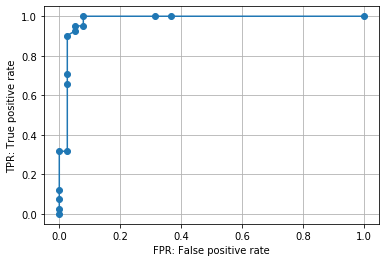

In [69]:
plt.plot(fpr, tpr, marker='o')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()

In [71]:
from sklearn import metrics

list_label = [0, 0, 0, 1, 1, 0, 1, 1]
list_score = [2, 1, 2, 4, 2, 1, 3, 5]

auc = metrics.roc_auc_score(list_label, list_score)
print(auc)

fpr, tpr, thresholds = metrics.roc_curve(list_label, list_score)
auc = metrics.auc(fpr, tpr)
print(auc)

0.9375
0.9375


In [75]:
auc = metrics.roc_auc_score(y_score01, y_true01)
print(auc)

0.9784980744544287


In [76]:
true_p = 0
false_n = 0
total_posi_data = len(predict_positive_list)

false_p = 0
true_n = 0
total_nega_data = len(predict_negative_list)

for i in range(total_posi_data):
    if predict_positive_list[i][0] > predict_positive_list[i][1]:
        true_p = true_p + 1
    else:
        false_n = false_n + 1
        
for i in range(total_nega_data):
    if predict_negative_list[i][0] < predict_negative_list[i][1]:
        true_n = true_n + 1
    else:
        false_p = false_p + 1
    
sensitivity = true_p/total_posi_data
print(sensitivity)
specificity = true_n/total_nega_data

precision = true_p/(true_p+false_p)
accuracy = (true_p+true_n)/(total_posi_data+total_nega_data)

0.7317073170731707


In [77]:
print(true_p)
print(false_n)
print(false_p)
print(true_n)
print(true_p+false_n+false_p+true_n)

30
11
1
37
79


In [78]:
df_table02 = pd.DataFrame(
    data={'予測（開裂）': [true_p, false_p], 
          '予測（非開裂）': [false_n, true_n]},
    index=['実際（開裂）', '実際（非開裂）']
)
 
df_table02

,予測（開裂）,予測（非開裂）
実際（開裂）,30,11
実際（非開裂）,1,37


In [79]:
print(sensitivity)
print(specificity)
print(precision)
print(accuracy)

0.7317073170731707
0.9736842105263158
0.967741935483871
0.8481012658227848


In [80]:
loss, acc = model.evaluate(x_val, y_val)
print(f"Test Loss: {loss*100}%")
print(f"Test Acc: {acc*100}%")

78/78 [==============================] - 0s 33us/sample - loss: 0.5206 - acc: 0.8846
Test Loss: 52.05643055721735%
Test Acc: 88.46153616905212%


In [82]:
Vurnum = 100

In [83]:
#saving the model.
save_dir = "./saving_model/DFS_parameters/"
model_name = datetime.datetime.now().strftime(f"%Y%m%d-%H%M%S_CNN_{Vernum}")
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at ../model_saving/DFS_parameters/20220801-053841_CNN_99 


In [84]:
model = load_model("./saving_model/DFS_parameters/20220801-053841_CNN_99")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [42]:
df1 = pd.DataFrame(
    data={'loss':history.history['loss'], 
          'acc':history.history['acc'],
          'val_loss':history.history['val_loss'], 
          'val_acc':history.history['val_acc']
         }, 
    index=np.arange(0, n)
)
 
df1

,loss,acc,val_loss,val_acc
0,2.447627,0.539432,0.680512,0.525641
1,0.679021,0.520505,0.666223,0.525641
2,0.651893,0.520505,0.625293,0.525641
3,0.591467,0.684543,0.589756,0.692308
4,0.571607,0.766562,0.613839,0.628205
...,...,...,...,...
195,0.195154,0.933754,0.394631,0.871795
196,0.166965,0.940063,0.396760,0.858974
197,0.179270,0.949527,0.467494,0.858974
198,0.174281,0.943218,0.397404,0.884615


In [47]:
i=4
j=3
k=0
m=32
n=100

df2 = pd.DataFrame(
    data={'Kernel':f'14x{i}',
         'Conv2D':str(j),
         'hidden01':str(k),
         'Batch_size':str(m),
         'epochs':str(n)}, 
    index=np.arange(4)
)
df2

,Kernel,Conv2D,hidden01,Batch_size,epochs
0,14x4,3,0,32,100
1,14x4,3,0,32,100
2,14x4,3,0,32,100
3,14x4,3,0,32,100


# 最適なepochs=71で計算する．

In [180]:
# DFS for parameters in test case.
#訓練データ
x_train = x_train_all
y_train = y_train_all

#検証データ
x_val = x_train_all_5crossval 
y_val = y_train_all_5crossval 


#old_session = KTF.get_session()
#session = tf.Session('')
#KTF.set_session(session)
#KTF.set_learning_phase(1)
#960 patterns, 当初は768 patterns



num = 1000
i = 3
j = 10
k = 5
m = 32
n = 200

#modelの定義の前に重みのリセットが必要で，これ？
tf.compat.v1.Session()
#sess = tf.compat.v1.Session()
#モデル構築
model = Sequential()
model.add(Conv2D(filters=j, kernel_size=(14, i), strides=(1, 1), padding='valid', 
                 data_format="channels_last", dilation_rate=(1, 1), activation='relu', 
                 use_bias=True, input_shape=(14, 8, 1), kernel_initializer='glorot_uniform', 
                 bias_initializer='zeros',  name='Conv2D_01'))
#model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None, 
#                       name='MaxPooling2D_01'))
model.add(Flatten(name='Flatten_01'))
#model.add(Dropout(0.50))
model.add(Dense(units=k, name='Denese_01', activation='relu'))
#model.add(Dense(units=50, name='Dense_01', activation='relu')
#model.add(Dense(units=10, name='Denese_03', activation='relu'))
model.add(Dense(units=2, name='Dense_out'))
model.add(Activation('softmax'))

#モデルの構造を表示
model.summary()

#訓練（学習）プロセスの設定
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])



#バリデーションロスが減少した場合に，各エポック終了後，モデルの重みを保存します
#checkpointer = ModelCheckpoint(filepath='./weights.hdf5', verbose=0, save_best_only=True, save_format="h5")
### add for TensorBoard
erly_stpg = EarlyStopping(patience=10, verbose=1,monitor='val_loss' , mode = 'min') 
chkfile = '../callbacks/' + '{0:2d}'.format(Vernum)+'_{epoch:02d}-{val_loss:.4f}.hdf5' #format関数
check_point = ModelCheckpoint(filepath = chkfile, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
check_point = [check_point]

log_dir = "log03/" + datetime.datetime.now().strftime(f"%Y%m%d-%H%M%S_num{num}")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
cbks=[tensorboard_callback]

#訓練の実行 
NUM_BATCH=m
NUM_EPOCHS=n
#history = model.fit(x_train, y_train, batch_size=NUM_BATCH, epochs=NUM_EPOCHS, validation_split=0.2, shuffle = True ,
#                    callbacks=[erly_stpg , chck_pont], verbose = 0, )
history = model.fit(x_train, y_train, batch_size=NUM_BATCH, epochs=NUM_EPOCHS, 
                     shuffle = True, verbose = 0,
                    callbacks=check_point,
                   validation_data=(x_val, y_val))


#saving the model.you can use the
save_dir = "./model_saving/DFS_parameter/CNN/"
model_name = datetime.datetime.now().strftime("%Y%m%d-%H%M%S"+f"_num{num}_recalculation")
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print(f'Saved trained model at %s num{num}' % model_path)

df1 = pd.DataFrame(
    data={'loss':history.history['loss'], 
          'acc':history.history['acc'],
          'val_loss':history.history['val_loss'], 
          'val_acc':history.history['val_acc']
         }, 
    index=np.arange(0, NUM_EPOCHS)
)

df1

df2 = pd.DataFrame(
    data={'Kernel':f'14x{i}',
         'Conv2D':str(j),
         'hidden01':str(k),
         'epochs':str(m),
         'Batch_size':str(n)}, 
    index=np.arange(4)
)
df2
print(pd.concat([df1, df2], axis=1))
df3 = pd.concat([df1, df2], axis=1)
print(f'num: {num}')
filename = f'./fitting_model/DFS_parameters/CNN/trial_num{num}_i{i}_j{j}_k{k}_m{m}_n{n}.csv'
df3.to_csv(filename)
print(filename)

print(f'{num} calculation ends.')
print(f'i: {i}')
print(f'j: {j}')
print(f'k: {k}')
print(f'm: {m}')
print(f'n: {n}')

num = num + 1
print("----------------------------------------------------")
#print(type(history))
#print(type(history.history))
#print(history.history.keys())
#print(history.history['loss'])
#print(history.history['acc'])
#print(history.history['val_loss'])
#print(history.history['val_acc'])
print("END")

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D_01 (Conv2D)           (None, 1, 6, 10)          430       
_________________________________________________________________
Flatten_01 (Flatten)         (None, 60)                0         
_________________________________________________________________
Denese_01 (Dense)            (None, 5)                 305       
_________________________________________________________________
Dense_out (Dense)            (None, 2)                 12        
_________________________________________________________________
activation_16 (Activation)   (None, 2)                 0         
Total params: 747
Trainable params: 747
Non-trainable params: 0
_________________________________________________________________

Epoch 00001: val_loss improved from inf to 0.69306, saving model to ../callbacks/99_01-0.6931.hdf5

Epoch 00002: val_los


Epoch 00092: val_loss did not improve from 0.69189

Epoch 00093: val_loss did not improve from 0.69189

Epoch 00094: val_loss did not improve from 0.69189

Epoch 00095: val_loss did not improve from 0.69189

Epoch 00096: val_loss did not improve from 0.69189

Epoch 00097: val_loss did not improve from 0.69189

Epoch 00098: val_loss did not improve from 0.69189

Epoch 00099: val_loss did not improve from 0.69189

Epoch 00100: val_loss improved from 0.69189 to 0.69189, saving model to ../callbacks/99_100-0.6919.hdf5

Epoch 00101: val_loss improved from 0.69189 to 0.69189, saving model to ../callbacks/99_101-0.6919.hdf5

Epoch 00102: val_loss improved from 0.69189 to 0.69189, saving model to ../callbacks/99_102-0.6919.hdf5

Epoch 00103: val_loss did not improve from 0.69189

Epoch 00104: val_loss did not improve from 0.69189

Epoch 00105: val_loss did not improve from 0.69189

Epoch 00106: val_loss did not improve from 0.69189

Epoch 00107: val_loss did not improve from 0.69189

Epoch 00

In [181]:
num = 1000
i = 3
j = 10
k = 5
m = 32
n = 71

filename = f'./fitting_model/DFS_parameters/CNN/trial_num{num}_i{i}_j{j}_k{k}_m{m}_n{n}.csv'
df_trial = pd.read_csv(filename)

In [182]:
df_trial

,Unnamed: 0,loss,acc,val_loss,val_acc,Kernel,Conv2D,hidden01,epochs,Batch_size
0,0,3.236337,0.558360,0.657852,0.525641,14x3,10.0,5.0,32.0,71.0
1,1,0.663293,0.523659,0.657774,0.525641,14x3,10.0,5.0,32.0,71.0
2,2,0.654638,0.536278,0.657761,0.525641,14x3,10.0,5.0,32.0,71.0
3,3,0.653869,0.536278,0.657700,0.525641,14x3,10.0,5.0,32.0,71.0
4,4,0.654214,0.561514,0.668165,0.525641,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
66,66,0.642406,0.552050,0.639489,0.551282,NaN,NaN,NaN,NaN,NaN
67,67,0.642414,0.552050,0.639489,0.551282,NaN,NaN,NaN,NaN,NaN
68,68,0.642418,0.552050,0.639488,0.551282,NaN,NaN,NaN,NaN,NaN
69,69,0.642383,0.552050,0.639489,0.551282,NaN,NaN,NaN,NaN,NaN


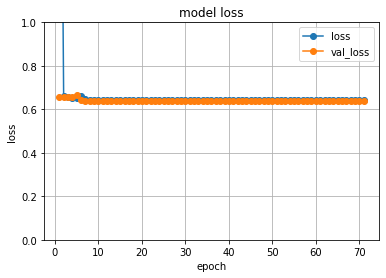

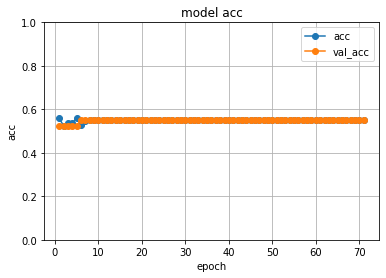

In [183]:
#filename = f'../fitting_model/DFS_parameters/CNN/trial_num302_i4_j10_k5_m32_n100.csv'
#df_trial = pd.read_csv(filename)
#df_trial
df_trdes = df_trial.describe()
df_trdes

#patterns=
epochs = n
plt.plot(range(1, epochs+1), df_trial.iloc[:, 1], "-o")
plt.plot(range(1, epochs+1), df_trial.iloc[:, 3], "-o")
plt.title('model loss')
plt.ylabel('loss')  # Y軸ラベル
plt.xlabel('epoch')  # X軸ラベル
plt.grid()
plt.legend(['loss', 'val_loss'], loc='best')
#plt.xlim(0,patterns)
plt.ylim(0.0,1.0)
plt.show()

#patterns=

plt.plot(range(1, epochs+1), df_trial.iloc[:, 2], "-o")
plt.plot(range(1, epochs+1), df_trial.iloc[:, 4], "-o")
plt.title('model acc')
plt.ylabel('acc')  # Y軸ラベル
plt.xlabel('epoch')  # X軸ラベル
plt.grid()
plt.legend(['acc', 'val_acc'], loc='best')
#plt.xlim(0,patterns)
plt.ylim(0.0,1.0)
plt.show()

# DFS_FC

In [130]:
loss_min_list = []
val_loss_min_list = []

acc_max_list = []
val_acc_max_list = []

num = 0
i=8
for n in [10, 50, 100, 200, 300]:
    for j in [3, 5, 10, 16]: 
        for k in [3, 5, 10, 16]: 
            for m in [32, 64, 128]:
                    filename = f'./fitting_model/DFS_parameters/FC/trial_num{num}_i{i}_j{j}_k{k}_m{m}_n{n}.csv'
                    df_trial = pd.read_csv(filename)
                    df_trdes = df_trial.describe()
                    loss_min_list.append(df_trdes.at["min", "loss"])
                    val_loss_min_list.append(df_trdes.at["min", "val_loss"])
                    acc_max_list.append(df_trdes.at["max", "acc"])
                    val_acc_max_list.append(df_trdes.at["max", "val_acc"])
                    #if df_trdes.at["min", "val_loss"] == min(val_loss_min_list):
                    #    print(num)
                    #    print(i)
                    #    print(j)
                    #    print(k)
                    #    print(m)
                    #    print(n)
                    #    print("--------------")
                    num = num+ 1

In [131]:
ld1 = sorted(val_loss_min_list)
print(ld1)

[0.3621895909309387, 0.3677786886692047, 0.37330426772435504, 0.3745171129703522, 0.4730558907374358, 0.4818118214607239, 0.5054449393199041, 0.5915521520834702, 0.5938016818119929, 0.6029244065284729, 0.6044434905052185, 0.614741325378418, 0.6167874657190763, 0.6246090531349182, 0.6327101588249207, 0.6336153149604797, 0.6378312706947327, 0.6403837433228126, 0.6406326706592853, 0.6410545110702515, 0.6439005732536316, 0.6483193039894104, 0.6508822441101074, 0.6540049314498901, 0.6554508209228516, 0.6576199027208182, 0.6613664627075195, 0.6614574790000916, 0.6614643717423464, 0.6658316315748752, 0.6812077745413169, 0.686621367931366, 0.6876889742337741, 0.6885455709237319, 0.6906760915731772, 0.6918360499235301, 0.6918517351150513, 0.6918537616729736, 0.691860020160675, 0.6918653005208725, 0.6918658018112183, 0.6918658018112183, 0.6918674111366272, 0.6918684610953698, 0.6918701743468261, 0.6918712533437289, 0.6918712854385376, 0.6918734327340738, 0.6918738163434542, 0.6918742121794285, 0

In [132]:
print(val_loss_min_list.index(ld1[0]))

155


trial_num155_i8_j3_k16_m128_n200.csv

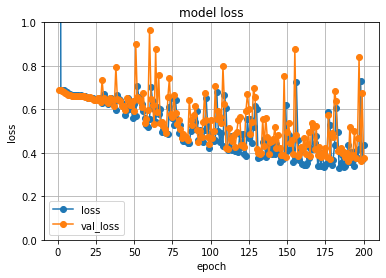

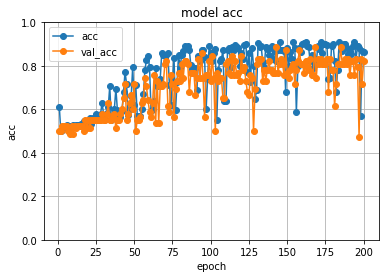

In [137]:
filename = f'./fitting_model/DFS_parameters/FC/trial_num155_i8_j3_k16_m128_n200.csv'
df_trial = pd.read_csv(filename)
df_trial
df_trdes = df_trial.describe()
df_trdes

#patterns=
epochs = 200
plt.plot(range(1, epochs+1), df_trial.iloc[:, 1], "-o")
plt.plot(range(1, epochs+1), df_trial.iloc[:, 3], "-o")
plt.title('model loss')
plt.ylabel('loss')  # Y軸ラベル
plt.xlabel('epoch')  # X軸ラベル
plt.grid()
plt.legend(['loss', 'val_loss'], loc='best')
#plt.xlim(0,patterns)
plt.ylim(0.0,1.0)
plt.show()

#patterns=

plt.plot(range(1, epochs+1), df_trial.iloc[:, 2], "-o")
plt.plot(range(1, epochs+1), df_trial.iloc[:, 4], "-o")
plt.title('model acc')
plt.ylabel('acc')  # Y軸ラベル
plt.xlabel('epoch')  # X軸ラベル
plt.grid()
plt.legend(['acc', 'val_acc'], loc='best')
#plt.xlim(0,patterns)
plt.ylim(0.0,1.0)
plt.show()

In [133]:
print(val_loss_min_list.index(ld1[1]))

230


trial_num230_i8_j16_k3_m128_n300.csv

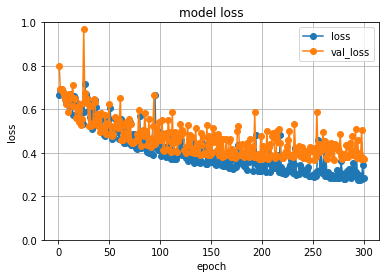

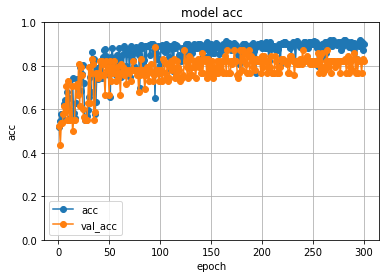

In [140]:
filename = f'./fitting_model/DFS_parameters/FC/trial_num230_i8_j16_k3_m128_n300.csv'
df_trial = pd.read_csv(filename)
df_trial
df_trdes = df_trial.describe()
df_trdes

#patterns=
epochs = 300
plt.plot(range(1, epochs+1), df_trial.iloc[:, 1], "-o")
plt.plot(range(1, epochs+1), df_trial.iloc[:, 3], "-o")
plt.title('model loss')
plt.ylabel('loss')  # Y軸ラベル
plt.xlabel('epoch')  # X軸ラベル
plt.grid()
plt.legend(['loss', 'val_loss'], loc='best')
#plt.xlim(0,patterns)
plt.ylim(0.0,1.0)
plt.show()

#patterns=
plt.plot(range(1, epochs+1), df_trial.iloc[:, 2], "-o")
plt.plot(range(1, epochs+1), df_trial.iloc[:, 4], "-o")
plt.title('model acc')
plt.ylabel('acc')  # Y軸ラベル
plt.xlabel('epoch')  # X軸ラベル
plt.grid()
plt.legend(['acc', 'val_acc'], loc='best')
#plt.xlim(0,patterns)
plt.ylim(0.0,1.0)
plt.show()

こっちの方がval_loss最小のモデルよりブレが少ない．
## コチラを採用してみる．

In [134]:
print(val_loss_min_list.index(ld1[2]))

235


trial_num235_i8_j16_k10_m64_n300.csv

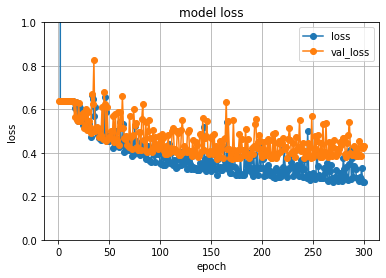

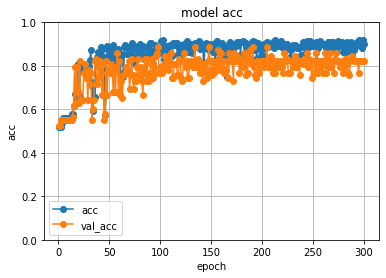

In [5]:
filename = f'./fitting_model/DFS_parameters/FC/trial_num235_i8_j16_k10_m64_n300.csv'
df_trial = pd.read_csv(filename)
df_trial
df_trdes = df_trial.describe()
df_trdes

#patterns=
epochs = 300
plt.plot(range(1, epochs+1), df_trial.iloc[:, 1], "-o")
plt.plot(range(1, epochs+1), df_trial.iloc[:, 3], "-o")
plt.title('model loss')
plt.ylabel('loss')  # Y軸ラベル
plt.xlabel('epoch')  # X軸ラベル
plt.grid()
plt.legend(['loss', 'val_loss'], loc='best')
#plt.xlim(0,patterns)
plt.ylim(0.0,1.0)
plt.show()

#patterns=
plt.plot(range(1, epochs+1), df_trial.iloc[:, 2], "-o")
plt.plot(range(1, epochs+1), df_trial.iloc[:, 4], "-o")
plt.title('model acc')
plt.ylabel('acc')  # Y軸ラベル
plt.xlabel('epoch')  # X軸ラベル
plt.grid()
plt.legend(['acc', 'val_acc'], loc='best')
#plt.xlim(0,patterns)
plt.ylim(0.0,1.0)
plt.show()

In [145]:
model = load_model("./saving_model/DFS_parameter/FC/20220801-071752_num230")
#trial_num230_i8_j16_k3_m128_n300.csv

In [6]:
df_trial

,Unnamed: 0,loss,acc,val_loss,val_acc,Kernel,Conv2D,hidden01,epochs,Batch_size
0,0,167.896986,0.520505,0.640463,0.525641,14x8,16.0,10.0,64.0,300.0
1,1,0.639723,0.520505,0.639862,0.525641,14x8,16.0,10.0,64.0,300.0
2,2,0.638499,0.520505,0.639832,0.551282,14x8,16.0,10.0,64.0,300.0
3,3,0.638406,0.539432,0.639805,0.551282,14x8,16.0,10.0,64.0,300.0
4,4,0.638313,0.561514,0.639782,0.551282,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
295,295,0.291071,0.895899,0.390958,0.820513,NaN,NaN,NaN,NaN,NaN
296,296,0.278831,0.902208,0.386498,0.820513,NaN,NaN,NaN,NaN,NaN
297,297,0.328662,0.880126,0.429141,0.820513,NaN,NaN,NaN,NaN,NaN
298,298,0.266583,0.917981,0.421621,0.820513,NaN,NaN,NaN,NaN,NaN


In [146]:
predict_positive_list = model.predict(x_train_positive_all_5crossval)
predict_negative_list = model.predict(x_train_negative_all_5crossval)

In [147]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_true = [0, 0, 0, 0, 1, 1, 1, 1]
y_score = [0.2, 0.3, 0.6, 0.8, 0.4, 0.5, 0.7, 0.9]

y_true01 = []
y_score01 = []
for i in range(len(predict_positive_list)):
    y_true01.append(predict_positive_list[i][0])
    y_score01.append(1)
for i  in range(len(predict_negative_list)):
    y_true01.append(predict_negative_list[i][0])
    y_score01.append(0)
        
y_true01 = list(y_true01)
y_score01 = list(y_score01)

#roc = roc_curve(y_true01, y_score01)

#print(type(roc))
# <class 'tuple'>

#print(len(roc))
# 3

In [148]:
fpr, tpr, thresholds = roc_curve(y_score01, y_true01)

print(fpr)
# [0.   0.   0.25 0.25 0.5  0.5  1.  ]

print(tpr)
# [0.   0.25 0.25 0.5  0.5  1.   1.  ]

print(thresholds)
# [1.9 0.9 0.8 0.7 0.6 0.4 0.2]

[0.         0.         0.         0.         0.         0.02631579
 0.02631579 0.05263158 0.10526316 0.13157895 0.13157895 0.15789474
 0.15789474 0.15789474 0.15789474 0.18421053 0.18421053 0.21052632
 0.21052632 0.26315789 1.        ]
[0.         0.02439024 0.3902439  0.43902439 0.48780488 0.48780488
 0.63414634 0.63414634 0.63414634 0.63414634 0.73170732 0.73170732
 0.75609756 0.80487805 0.87804878 0.87804878 0.90243902 0.90243902
 0.95121951 0.95121951 1.        ]
[1.9999472  0.9999472  0.9729173  0.95614725 0.9178859  0.86492276
 0.74905074 0.7264192  0.72304523 0.6920402  0.65577173 0.626824
 0.602819   0.4962983  0.38827708 0.3729105  0.32962435 0.28417677
 0.27347192 0.19369563 0.18540077]


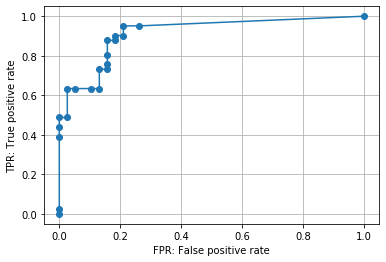

In [149]:
plt.plot(fpr, tpr, marker='o')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()

In [150]:
from sklearn import metrics

list_label = [0, 0, 0, 1, 1, 0, 1, 1]
list_score = [2, 1, 2, 4, 2, 1, 3, 5]

auc = metrics.roc_auc_score(list_label, list_score)
print(auc)

fpr, tpr, thresholds = metrics.roc_curve(list_label, list_score)
auc = metrics.auc(fpr, tpr)
print(auc)

0.9375
0.9375


In [151]:
auc = metrics.roc_auc_score(y_score01, y_true01)
print(auc)

0.9146341463414636


In [152]:
true_p = 0
false_n = 0
total_posi_data = len(predict_positive_list)

false_p = 0
true_n = 0
total_nega_data = len(predict_negative_list)

for i in range(total_posi_data):
    if predict_positive_list[i][0] > predict_positive_list[i][1]:
        true_p = true_p + 1
    else:
        false_n = false_n + 1
        
for i in range(total_nega_data):
    if predict_negative_list[i][0] < predict_negative_list[i][1]:
        true_n = true_n + 1
    else:
        false_p = false_p + 1
    
sensitivity = true_p/total_posi_data
print(sensitivity)
specificity = true_n/total_nega_data

precision = true_p/(true_p+false_p)
accuracy = (true_p+true_n)/(total_posi_data+total_nega_data)

0.7560975609756098


In [153]:
print(true_p)
print(false_n)
print(false_p)
print(true_n)
print(true_p+false_n+false_p+true_n)

31
10
6
32
79


In [154]:
df_table02 = pd.DataFrame(
    data={'予測（開裂）': [true_p, false_p], 
          '予測（非開裂）': [false_n, true_n]},
    index=['実際（開裂）', '実際（非開裂）']
)
 
df_table02

,予測（開裂）,予測（非開裂）
実際（開裂）,31,10
実際（非開裂）,6,32


In [155]:
print(sensitivity)
print(specificity)
print(precision)
print(accuracy)

0.7560975609756098
0.8421052631578947
0.8378378378378378
0.7974683544303798


In [156]:
loss, acc = model.evaluate(x_val, y_val)
print(f"Test Loss: {loss*100}%")
print(f"Test Acc: {acc*100}%")

78/78 [==============================] - 0s 475us/sample - loss: 0.3735 - acc: 0.8205
Test Loss: 37.35038286600357%
Test Acc: 82.05128312110901%
